In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("dermatology_database_1.csv")

In [3]:
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [17]:
print("Printing first 5 rows of the dataset:")
print(data.head())

print("\nPrinting last 5 rows of the dataset:")
print(data.tail())

print("\nPrinting count of missing values per column:")
print(data.isnull().sum())

print("\nPrinting number of rows in the dataset:")
print(data.shape[0])

print("\nPrinting number of columns in the dataset:")
print(data.shape[1])

print("\nPrinting index of the dataset:")
print(data.index)

print("\nPrinting summary statistics of the dataset:")
print(data.describe())

print("\nPrinting column names of the dataset:")
print(data.columns)

Printing first 5 rows of the dataset:
   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   


In [31]:
print(data.iloc[:4, :])  # first 4 rows, all column

   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   

   disa

In [44]:
sample=data.iloc[:1,:]
smaple=pd.DataFrame(sample)
print(sample)

   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   

   disappearance_granular_layer  vacuolisation_damage_basal_layer  spongiosis  \
0                             0                                 0           3   

   saw_tooth_appearance_retes  follicular_horn_plug  \
0                           0                     0   

   perifollicular_parakeratosis  inflammatory_mononuclear_infiltrate  \
0                             0                                    1   

   band_like_infiltrate  age  class  
0                     0   55      2  

[1 rows x 35 columns]


In [53]:
# Convert 'age' to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Fill NaN values with 0 (or mean if you prefer)
data['age'] = data['age'].fillna(0)


In [57]:
import math
from collections import Counter

# List of feature columns (exclude the target 'class')
feature_columns = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement', 'disappearance_granular_layer',
    'vacuolisation_damage_basal_layer', 'spongiosis', 'saw_tooth_appearance_retes',
    'follicular_horn_plug', 'perifollicular_parakeratosis',
    'inflammatory_mononuclear_infiltrate', 'band_like_infiltrate', 'age'
]

def KNN(sample, data_row):
    # Step 1: Compute Euclidean distance for each row
    sample['temp'] = 0
    for col in feature_columns:
        sample['temp'] += (sample[col] - data_row[col])**2
    sample['temp'] = sample['temp']**0.5  # sqrt of sum of squares
    
    # Step 2: Sort rows by distance (ascending)
    sample_sorted = sample.sort_values(by='temp', ascending=True)
    
    # Step 3: Pick top √N rows (number of neighbors)
    K = int(math.sqrt(sample_sorted.shape[0]))
    top_k = sample_sorted.iloc[:K, :]
    
    # Step 4: Find the majority class among top K neighbors
    majority_class = Counter(top_k['class']).most_common(1)[0][0]
    
    return majority_class


In [59]:
import pandas as pd

# New test data point
new_point = pd.Series({
    'erythema': 2,
    'scaling': 2,
    'definite_borders': 0,
    'itching': 1,
    'koebner_phenomenon': 0,
    'polygonal_papules': 0,
    'follicular_papules': 0,
    'oral_mucosal_involvement': 0,
    'knee_and_elbow_involvement': 1,
    'scalp_involvement': 0,
    'disappearance_granular_layer': 0,
    'vacuolisation_damage_basal_layer': 0,
    'spongiosis': 2,
    'saw_tooth_appearance_retes': 0,
    'follicular_horn_plug': 0,
    'perifollicular_parakeratosis': 0,
    'inflammatory_mononuclear_infiltrate': 1,
    'band_like_infiltrate': 0,
    'age': 30
})

predicted_class = KNN(sample=data, data_row=new_point)
print("Predicted class for new data point:", predicted_class)


Predicted class for new data point: 2


In [56]:
print(data.dtypes)

erythema                                 int64
scaling                                  int64
definite_borders                         int64
itching                                  int64
koebner_phenomenon                       int64
polygonal_papules                        int64
follicular_papules                       int64
oral_mucosal_involvement                 int64
knee_and_elbow_involvement               int64
scalp_involvement                        int64
family_history                           int64
melanin_incontinence                     int64
eosinophils_infiltrate                   int64
PNL_infiltrate                           int64
fibrosis_papillary_dermis                int64
exocytosis                               int64
acanthosis                               int64
hyperkeratosis                           int64
parakeratosis                            int64
clubbing_rete_ridges                     int64
elongation_rete_ridges                   int64
thinning_supr

In [72]:
predicted_classes=[]
for i in range(len(data)):
    current=data.iloc[i]
    remaining=data.drop(i)
    predict=KNN(sample=remaining,data_row=current)
    predicted_classes.append(predict)
data['predict']=predicted_classes
print(len(predicted_classes))
print("predicted_classes",predicted_classes)

366
predicted_classes [2, 6, 3, 1, 3, 1, 5, 3, 2, 2, 1, 2, 2, 6, 1, 1, 5, 1, 3, 5, 6, 2, 2, 3, 2, 4, 6, 5, 2, 3, 1, 6, 1, 6, 6, 6, 6, 5, 3, 1, 2, 1, 5, 4, 5, 3, 2, 6, 2, 1, 3, 4, 1, 1, 1, 1, 2, 3, 4, 2, 6, 1, 5, 1, 2, 1, 1, 2, 1, 1, 4, 6, 3, 1, 5, 2, 2, 1, 3, 5, 1, 2, 4, 6, 1, 1, 1, 3, 1, 2, 2, 5, 5, 1, 3, 5, 2, 1, 1, 6, 2, 1, 1, 2, 4, 1, 1, 1, 3, 1, 1, 5, 1, 3, 3, 5, 2, 3, 4, 6, 2, 1, 6, 1, 1, 2, 6, 3, 5, 5, 1, 1, 3, 4, 4, 1, 1, 4, 3, 2, 4, 5, 1, 3, 3, 3, 2, 5, 2, 2, 2, 1, 2, 1, 5, 3, 1, 3, 2, 2, 4, 1, 2, 6, 2, 1, 1, 3, 4, 3, 3, 1, 1, 1, 3, 1, 1, 2, 3, 3, 1, 1, 1, 1, 6, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 2, 3, 2, 4, 2, 5, 4, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 4, 2, 2, 5, 2, 2, 1, 4, 5, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 4, 2, 1, 2, 4, 4, 6, 6, 6, 6, 6, 6, 6, 4, 1, 2, 1, 1, 1, 1, 1, 2, 5, 2, 1, 4, 1, 1, 1, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 6, 5, 4, 1, 2, 3, 3, 3, 4, 1, 1, 2, 2, 6, 1, 1, 1, 3, 5, 3, 3, 3, 1, 1, 1, 1, 4, 4, 1, 1, 2,

In [78]:
mse=(data['class']==data['predict']).sum()/len(data)
print(mse)

0.7049180327868853


In [81]:
print(data[['class','predict']])

     class  predict
0        2        2
1        1        6
2        3        3
3        1        1
4        3        3
..     ...      ...
361      4        4
362      4        4
363      3        3
364      3        3
365      1        1

[366 rows x 2 columns]


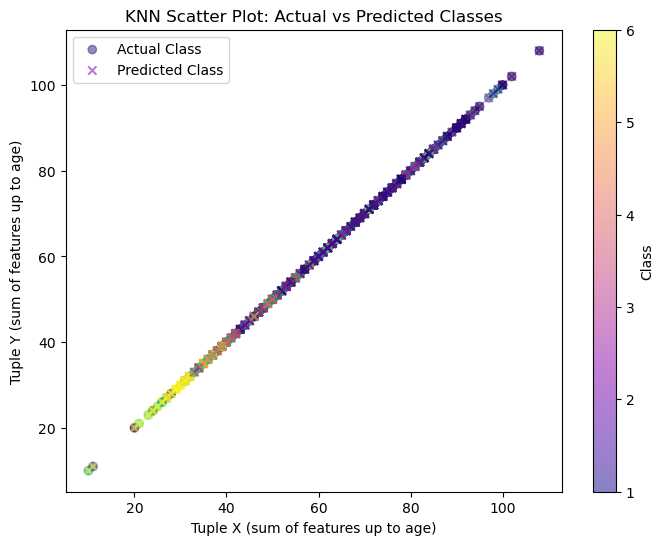

In [93]:
import matplotlib.pyplot as plt

# Features used for the scatter plot (up to 'age', excluding 'class' and 'temp')
features_up_to_age = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement', 'family_history',
    'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
    'parakeratosis', 'clubbing_rete_ridges', 'elongation_rete_ridges',
    'thinning_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess',
    'focal_hypergranulosis', 'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
    'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
    'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate', 
    'band_like_infiltrate', 'age'
]

# X and Y are computed as the sum of feature values for each row
X = data[features_up_to_age].sum(axis=1)  # sum of all features for X-axis
Y = data[features_up_to_age].sum(axis=1)  # sum of all features for Y-axis (same here, can choose differently)

plt.figure(figsize=(8,6))

# Plot actual class
plt.scatter(X, Y, c=data['class'], cmap='viridis', alpha=0.6, marker='o', label='Actual Class')

# Plot predicted class
plt.scatter(X, Y, c=data['predict'], cmap='plasma', alpha=0.5, marker='x', label='Predicted Class')

plt.xlabel('Tuple X (sum of features up to age)')
plt.ylabel('Tuple Y (sum of features up to age)')
plt.title('KNN Scatter Plot: Actual vs Predicted Classes')
plt.legend()
plt.colorbar(label='Class')
plt.show()


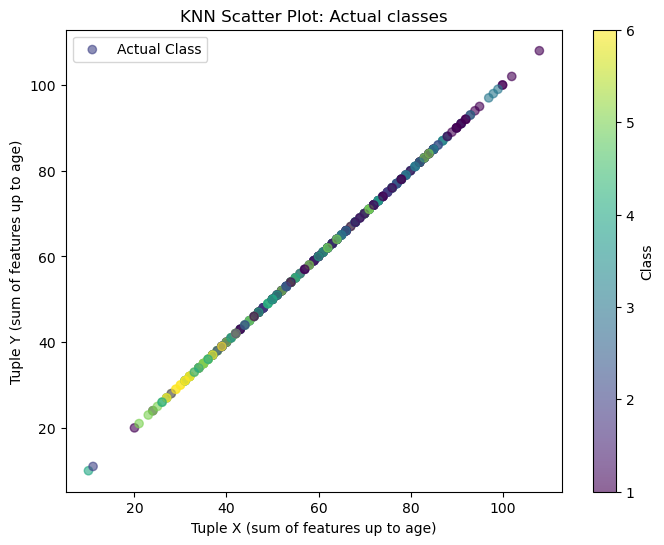

In [95]:
X = data[features_up_to_age].sum(axis=1)  # sum of all features for X-axis
Y = data[features_up_to_age].sum(axis=1)  # sum of all features for Y-axis (same here, can choose differently)

plt.figure(figsize=(8,6))

# Plot actual class
plt.scatter(X, Y, c=data['class'], cmap='viridis', alpha=0.6, marker='o', label='Actual Class')
plt.xlabel('Tuple X (sum of features up to age)')
plt.ylabel('Tuple Y (sum of features up to age)')
plt.title('KNN Scatter Plot: Actual classes')
plt.legend()
plt.colorbar(label='Class')
plt.show()

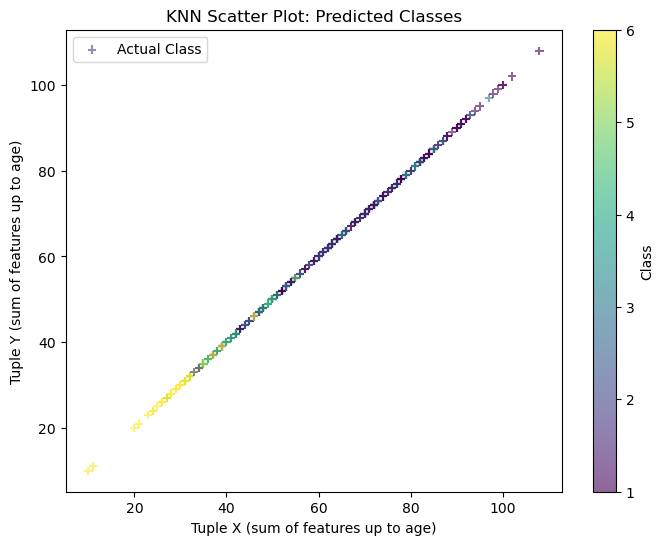

In [100]:
# X and Y are computed as the sum of feature values for each row
X = data[features_up_to_age].sum(axis=1)  # sum of all features for X-axis
Y = data[features_up_to_age].sum(axis=1)  # sum of all features for Y-axis (same here, can choose differently)

plt.figure(figsize=(8,6))

# Plot actual class
plt.scatter(X, Y, c=data['predict'], cmap='viridis', alpha=0.6, marker='+', label='Actual Class')

plt.xlabel('Tuple X (sum of features up to age)')
plt.ylabel('Tuple Y (sum of features up to age)')
plt.title('KNN Scatter Plot: Predicted Classes')
plt.legend()
plt.colorbar(label='Class')
plt.show()

In [113]:
import math

# List of feature columns (exclude the target 'class')
feature_columns = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement', 'disappearance_granular_layer',
    'vacuolisation_damage_basal_layer', 'spongiosis', 'saw_tooth_appearance_retes',
    'follicular_horn_plug', 'perifollicular_parakeratosis',
    'inflammatory_mononuclear_infiltrate', 'band_like_infiltrate', 'age'
]

def KNN_Regression(sample, data_row):
    # Step 1: Compute Euclidean distance between the current row and all others
    sample['temp'] = 0
    for col in feature_columns:
        sample['temp'] += (sample[col] - data_row[col])**2
    sample['temp'] = sample['temp']**0.5

    # Step 2: Sort rows by distance (ascending — nearest first)
    sample_sorted = sample.sort_values(by='temp', ascending=True)

    # Step 3: Select top √N rows as neighbors
    K = int(math.sqrt(sample_sorted.shape[0]))
    top_k = sample_sorted.iloc[:K, :]

    # Step 4: Predict as the average of neighbor class values
    predicted_value = top_k['class'].mean()

    return predicted_value


In [114]:
# Example new data point (you can modify values)
new_point = {
    'erythema': 2,
    'scaling': 3,
    'definite_borders': 1,
    'itching': 2,
    'koebner_phenomenon': 1,
    'polygonal_papules': 0,
    'follicular_papules': 1,
    'oral_mucosal_involvement': 0,
    'knee_and_elbow_involvement': 1,
    'scalp_involvement': 2,
    'disappearance_granular_layer': 1,
    'vacuolisation_damage_basal_layer': 0,
    'spongiosis': 1,
    'saw_tooth_appearance_retes': 1,
    'follicular_horn_plug': 0,
    'perifollicular_parakeratosis': 1,
    'inflammatory_mononuclear_infiltrate': 2,
    'band_like_infiltrate': 1,
    'age': 45
}

import pandas as pd

# Convert to Series for compatibility
new_point_series = pd.Series(new_point)

# Predict using your KNN Regression
predicted_value = KNN_Regression(sample=data, data_row=new_point_series)
print("Predicted value (regression output):", predicted_value)


Predicted value (regression output): 2.0


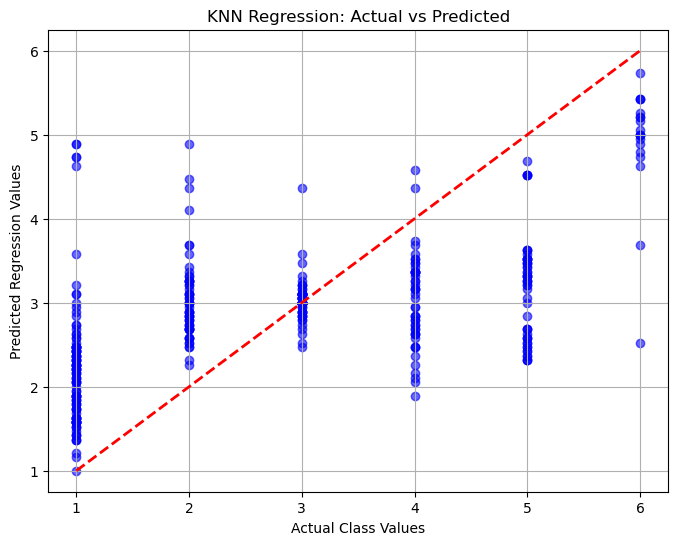

In [115]:
import matplotlib.pyplot as plt

# Step 1: Generate predictions for all rows (leave-one-out style)
predicted_values = []
for i in range(len(data)):
    current = data.iloc[i]
    remaining = data.drop(i)
    pred = KNN_Regression(sample=remaining, data_row=current)
    predicted_values.append(pred)

# Step 2: Add predictions to dataset
data['predicted'] = predicted_values

# Step 3: Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(data['class'], data['predicted'], color='blue', alpha=0.6)
plt.plot([data['class'].min(), data['class'].max()],
         [data['class'].min(), data['class'].max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Class Values")
plt.ylabel("Predicted Regression Values")
plt.title("KNN Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


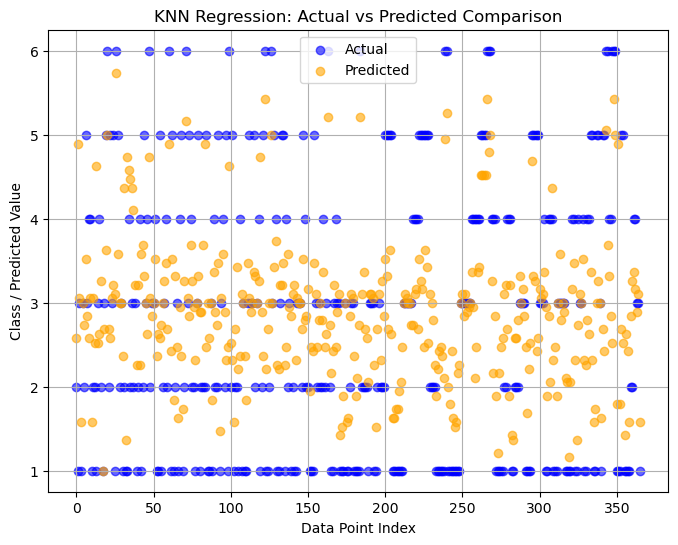

In [116]:
import matplotlib.pyplot as plt

# Step 1: Generate predictions (leave-one-out style)
predicted_values = []
for i in range(len(data)):
    current = data.iloc[i]
    remaining = data.drop(i)
    pred = KNN_Regression(sample=remaining, data_row=current)
    predicted_values.append(pred)

# Step 2: Add predictions to dataset
data['predicted'] = predicted_values

# Step 3: Plot Actual vs Predicted (different colors)
plt.figure(figsize=(8,6))

# Actual class points
plt.scatter(range(len(data)), data['class'], color='blue', alpha=0.6, label='Actual')

# Predicted regression points
plt.scatter(range(len(data)), data['predicted'], color='orange', alpha=0.6, label='Predicted')

plt.xlabel("Data Point Index")
plt.ylabel("Class / Predicted Value")
plt.title("KNN Regression: Actual vs Predicted Comparison")
plt.legend()
plt.grid(True)
plt.show()
